In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784 # image size is 28x28 
hidden_state = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#downloading mnist dataset
train_data = torchvision.datasets.MNIST(root='./data',train=True,
            transform=transforms.ToTensor(),download=True)
test_data = torchvision.datasets.MNIST(root='./data',train=False,
            transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data,
                        batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                        batch_size=batch_size,shuffle=False )

examples = iter(train_loader)
sample,label = examples.next()
print(sample.shape,label.shape)

100.1%

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


113.5%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


100.4%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


180.4%..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!
torch.Size([100, 1, 28, 28]) torch.Size([100])


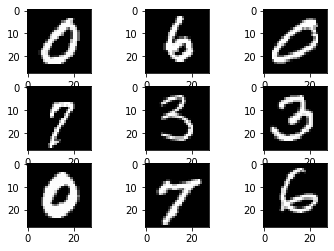

In [9]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(sample[i][0], cmap='gray')
plt.show()

In [17]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size,hidden_state,num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        out = model(images)
        loss = criterion(out,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss= {loss.item():4f}')
  
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        out = model(images)
        
        _,pred = torch.max(out,1)
        
        n_samples += labels.shape[0]
        n_correct = (pred == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy= {acc}')

epoch 1/2, step 100/600, loss= 0.432503
epoch 1/2, step 200/600, loss= 0.351458
epoch 1/2, step 300/600, loss= 0.344071
epoch 1/2, step 400/600, loss= 0.223364
epoch 1/2, step 500/600, loss= 0.198677
epoch 1/2, step 600/600, loss= 0.353260
epoch 2/2, step 100/600, loss= 0.303959
epoch 2/2, step 200/600, loss= 0.360392
epoch 2/2, step 300/600, loss= 0.170686
epoch 2/2, step 400/600, loss= 0.263382
epoch 2/2, step 500/600, loss= 0.159624
epoch 2/2, step 600/600, loss= 0.135084
Accuracy= 0.92


600